In [15]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import math

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Loading datasets and cleaning
files = {
    "ONGC": 'C:/Users/hp/Downloads/ONGC_stock.csv',
    "Wipro": 'C:/Users/hp/Downloads/wipro_stock.csv',
    "Asian Paints": 'C:/Users/hp/Downloads/ASIANPAINTS_stock.csv',
    "CIPLA": 'C:/Users/hp/Downloads/CIPLA_stock.csv',
    "HDFC Bank": 'C:/Users/hp/Downloads/HDFCBANK_stock.csv',
    "Hindustan Unilever": 'C:/Users/hp/Downloads/HindustanUnilever_stock.csv',
    "Infosys": 'C:/Users/hp/Downloads/INFOSYS_stock.csv',
    "ITC": 'C:/Users/hp/Downloads/ITC_stock.csv',
    "Tata Motors": 'C:/Users/hp/Downloads/TATAMOTORS_stock.csv',
    "TCS": 'C:/Users/hp/Downloads/TCS_stock.csv',
}

dataframes = {}
for name, path in files.items():
    print(f"Processing File: {name}")
    # Load each dataset
    df = pd.read_csv(path)
    
    # Drop unwanted columns (those starting with 'Unnamed')
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    # Store cleaned dataframe in the dictionary
    dataframes[name] = df

    # Display initial rows of the cleaned data
    print(df.head())
    print(df.columns)
    print(df.shape)

# Merging all datasets into one
try:
    merged_data = pd.concat(dataframes.values(), ignore_index=True)
except ValueError as e:
    print("Error during merging:", e)
    raise

# Data Preprocessing - Date Formatting
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%d-%m-%Y', errors='coerce')
print("Invalid dates:", merged_data['Date'].isna().sum())  # Check for invalid dates
merged_data.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

# Ensure 'Close' column is numeric
merged_data['Close'] = pd.to_numeric(merged_data['Close'], errors='coerce')
print("Invalid Close values:", merged_data['Close'].isna().sum())  # Check for NaN in 'Close'
merged_data.dropna(subset=['Close'], inplace=True)  # Drop rows with NaN in 'Close'

# Sorting by Date
merged_data.sort_values('Date', inplace=True)

# Filling missing values (forward fill)
merged_data.fillna(method='ffill', inplace=True)

# Final check of the merged data
print(merged_data.head())
print(merged_data.shape)

# Feature Engineering - Adding Indicators
merged_data['Daily Return'] = merged_data['Close'].pct_change()
merged_data['5-Day MA'] = merged_data['Close'].rolling(window=5).mean()
merged_data['20-Day MA'] = merged_data['Close'].rolling(window=20).mean()
merged_data['20-Day StdDev'] = merged_data['Close'].rolling(window=20).std()
merged_data['Upper Band'] = merged_data['20-Day MA'] + (merged_data['20-Day StdDev'] * 2)
merged_data['Lower Band'] = merged_data['20-Day MA'] - (merged_data['20-Day StdDev'] * 2)

# Dropping NaN values after rolling calculations
merged_data.dropna(inplace=True)

# Display the cleaned and processed data
print(merged_data.head())
print(merged_data.shape)


Processing File: ONGC
                Date   Open   High    Low  Close  Volume
0  1/3/2000 15:30:00  22.78  23.82  22.78  23.72    9600
1  1/4/2000 15:30:00  22.39  23.30  22.33  22.95   17900
2  1/5/2000 15:30:00  22.33  24.79  22.28  24.79   27000
3  1/6/2000 15:30:00  26.00  26.10  24.18  24.37   35600
4  1/7/2000 15:30:00  24.78  24.78  23.67  23.97   11400
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
(5937, 6)
Processing File: Wipro
                Date    Open    High     Low   Close  Volume
0  1/3/2000 15:30:00  102.15  102.16  102.15  102.16    1599
1  1/4/2000 15:30:00  110.33  110.33  110.33  110.33    4392
2  1/5/2000 15:30:00  110.33  119.16  101.81  112.13  132297
3  1/6/2000 15:30:00  117.93  119.36  104.63  109.96   72840
4  1/7/2000 15:30:00  103.16  103.16  101.16  101.16   10110
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
(5932, 6)
Processing File: Asian Paints
                Date   Open   High    Low  Close 

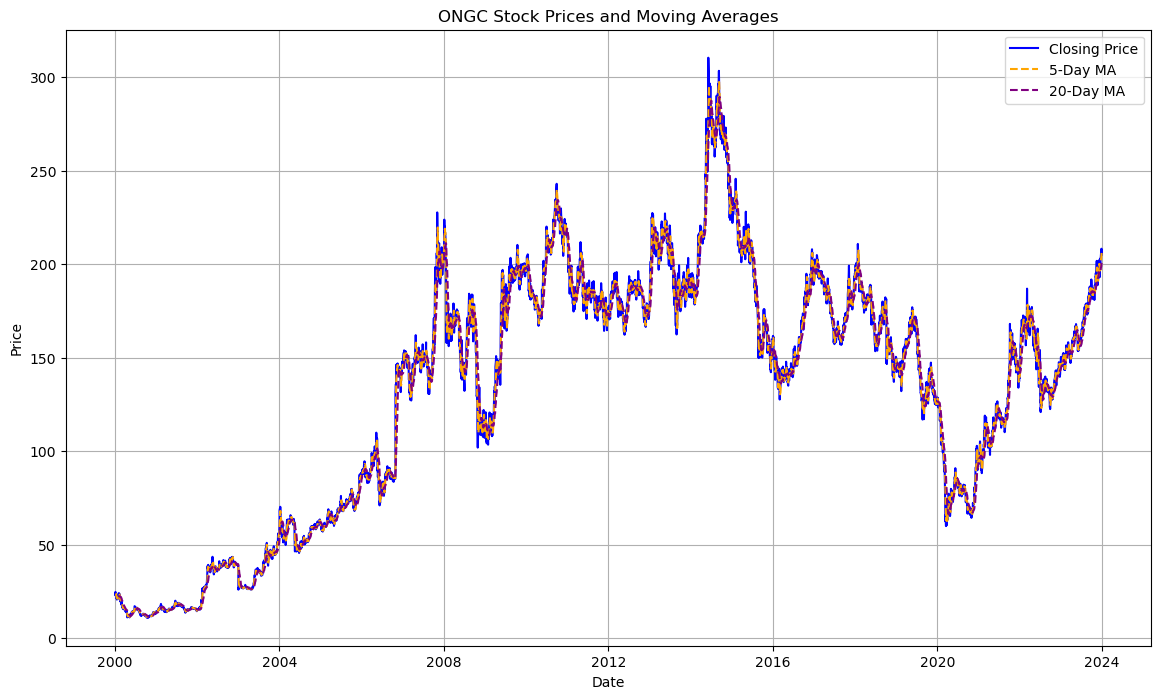

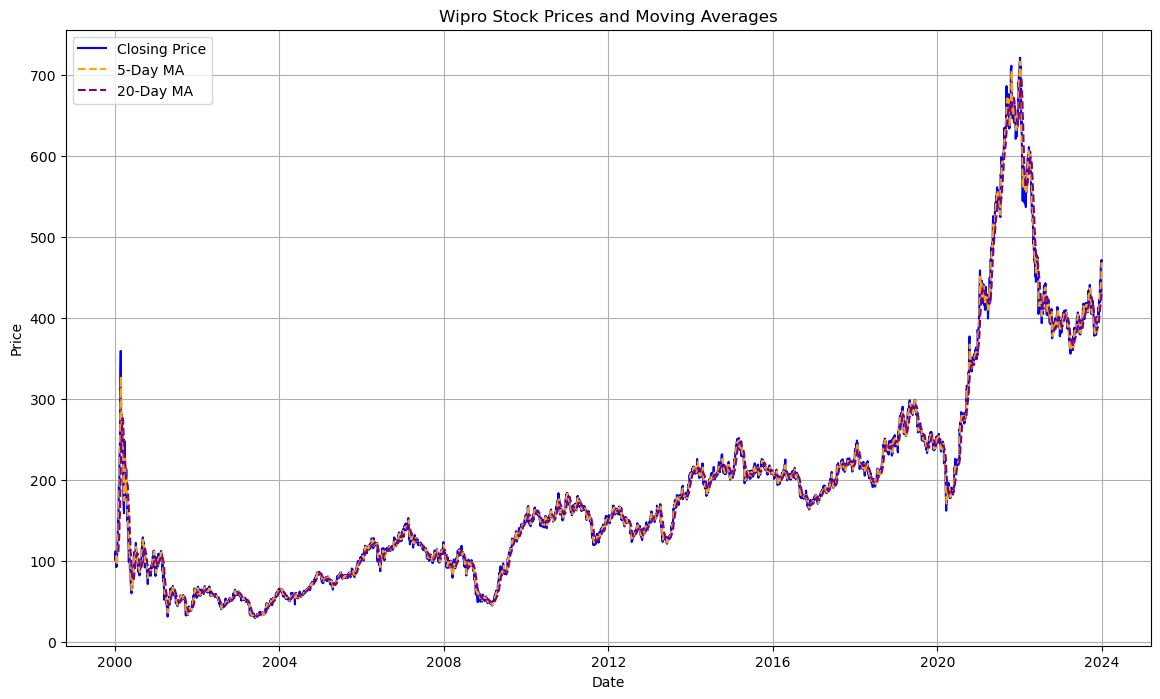

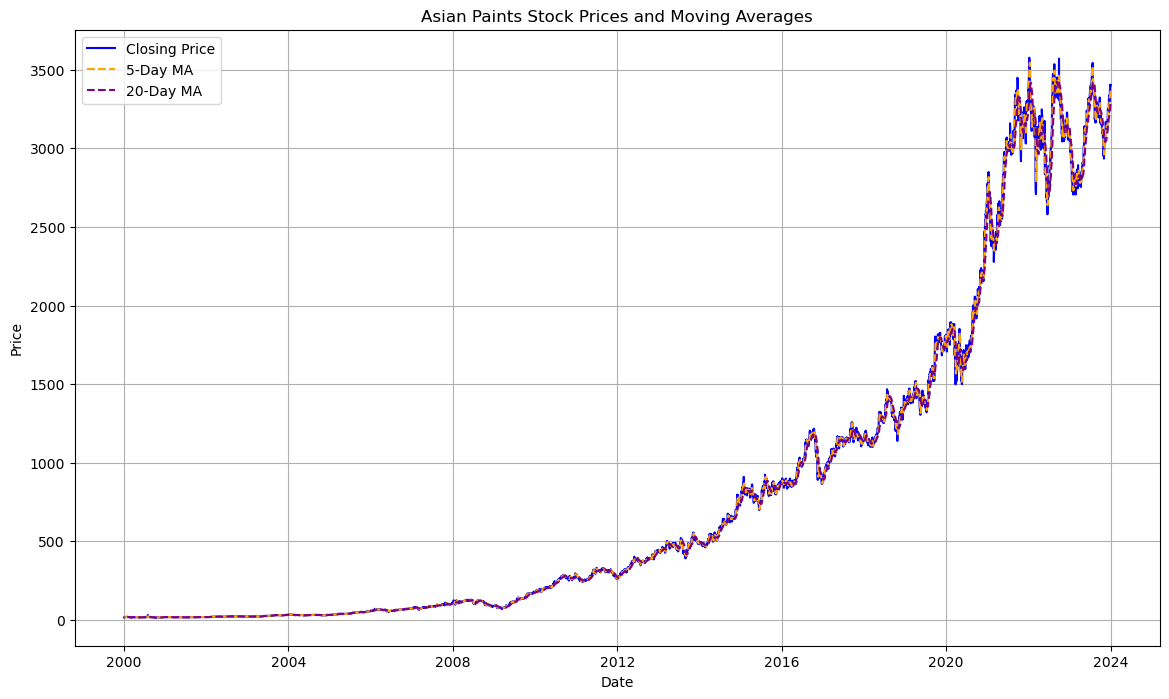

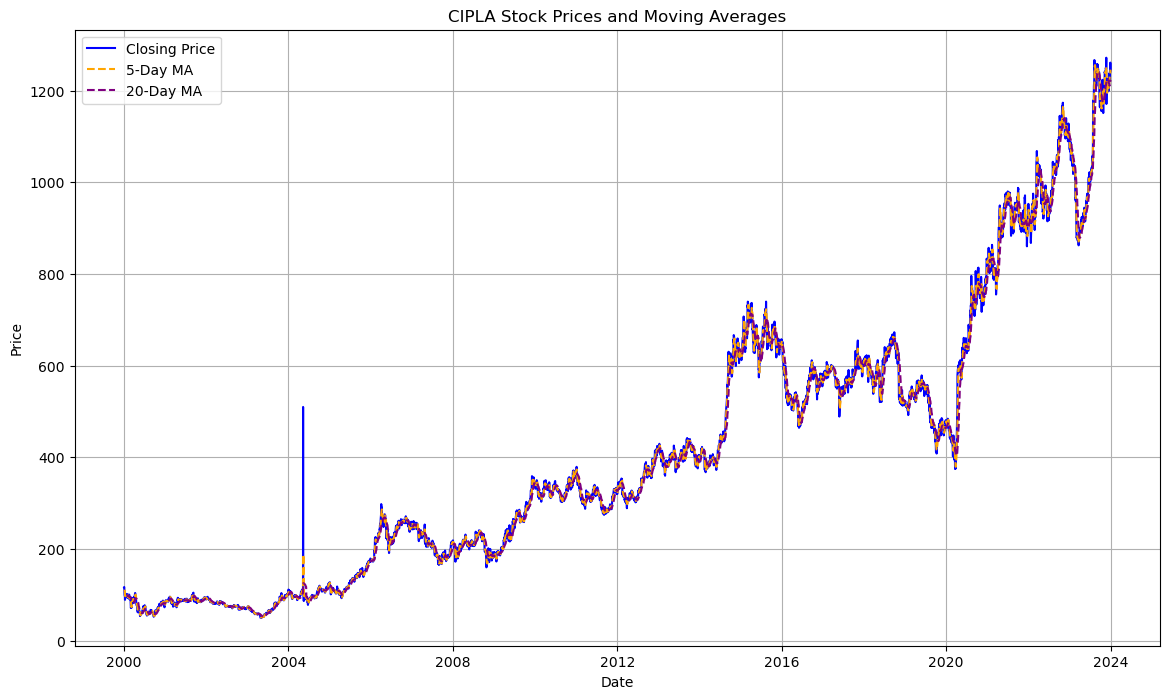

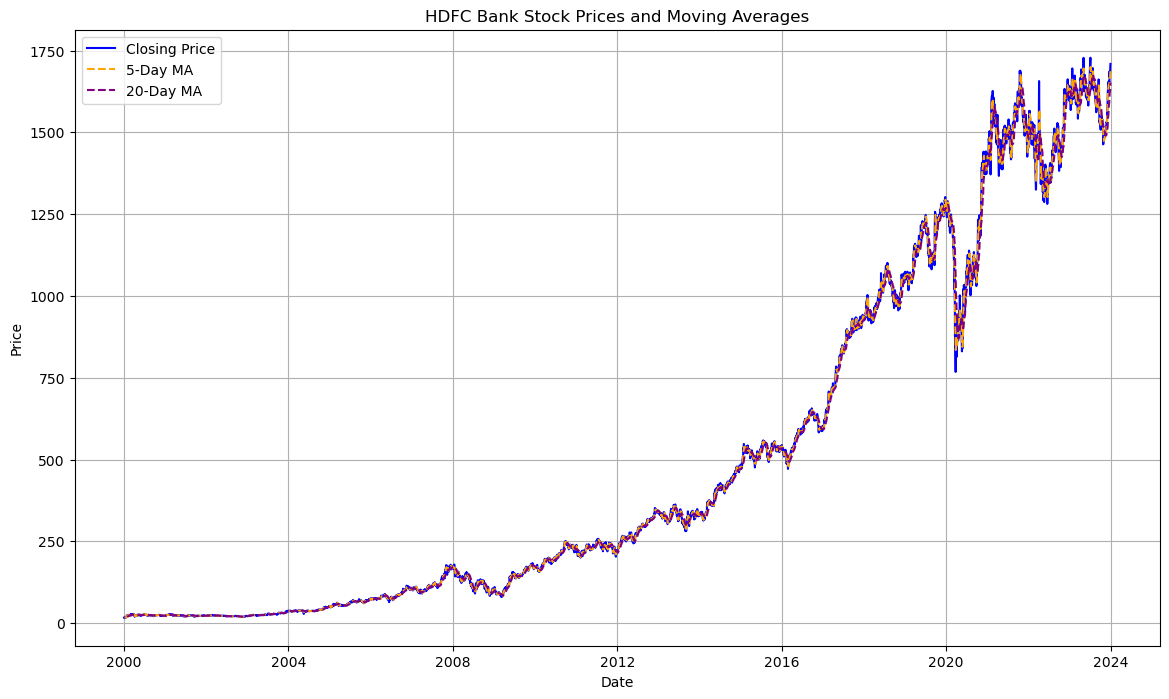

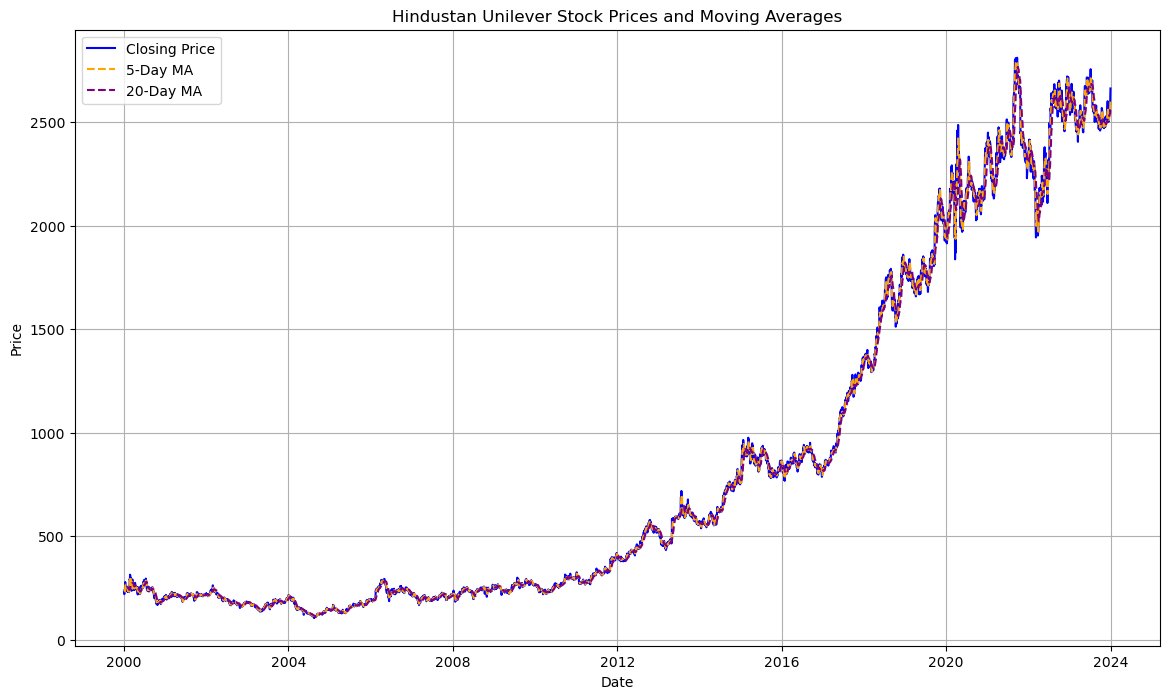

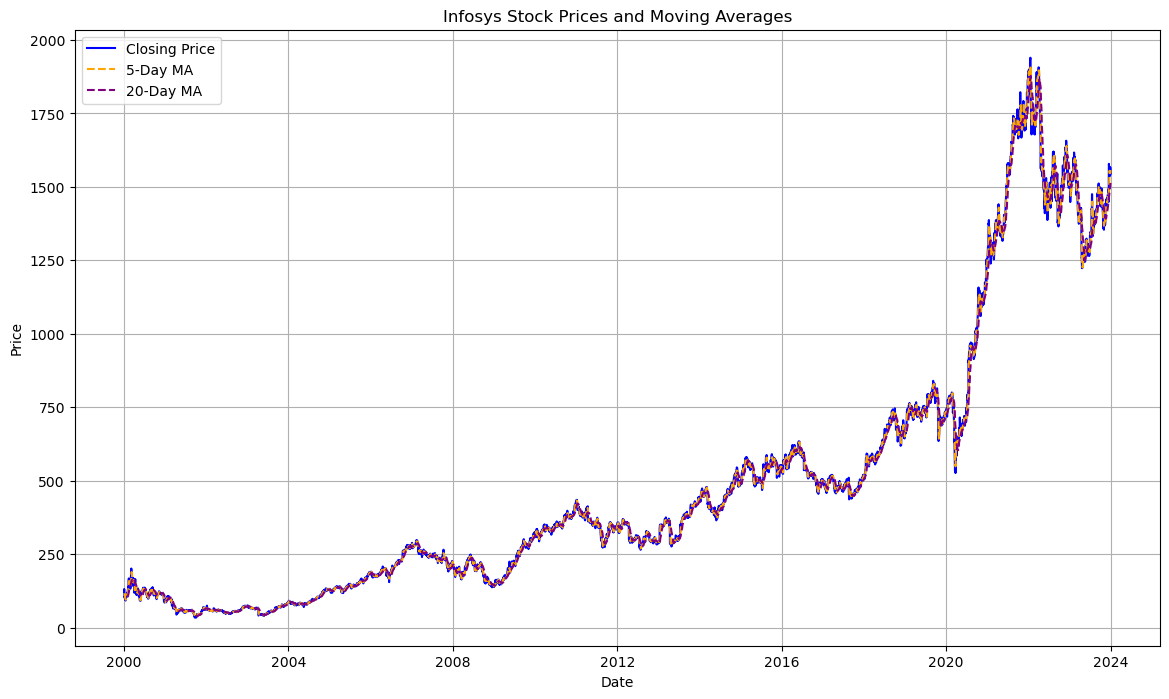

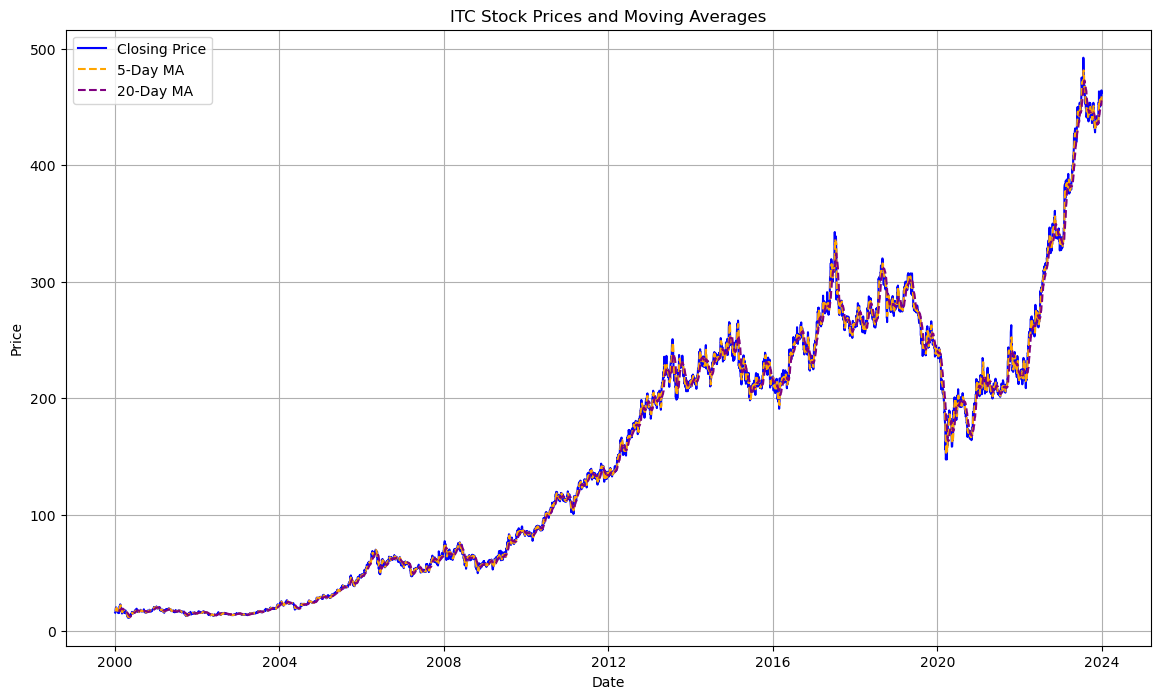

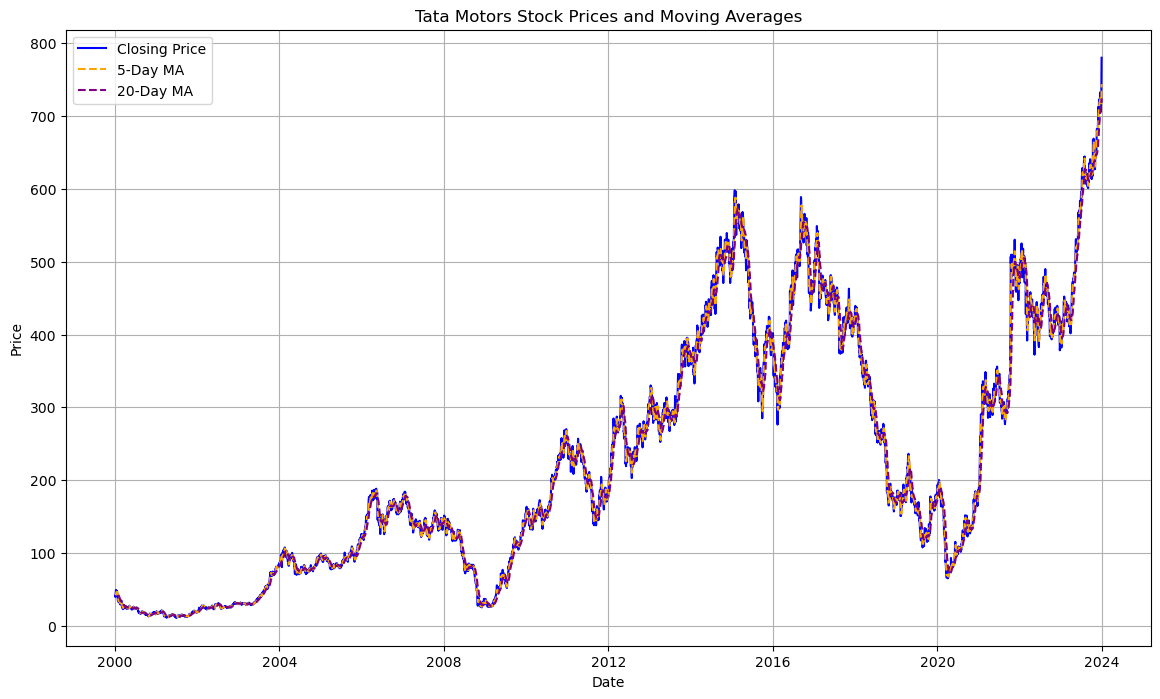

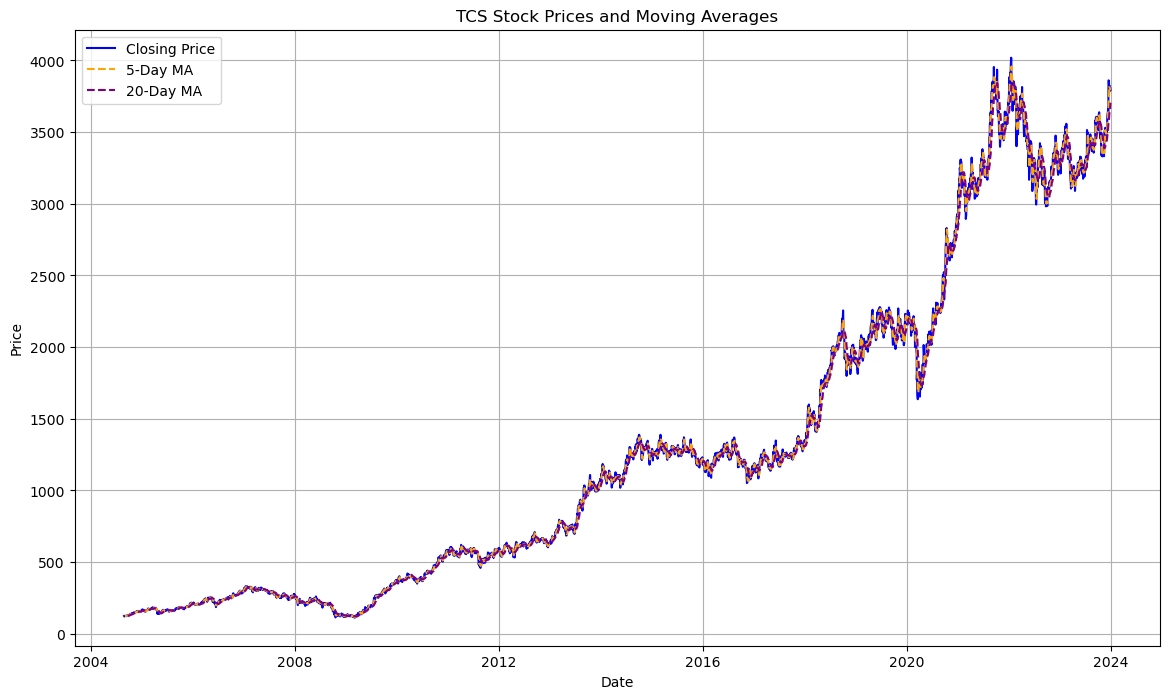

In [19]:
# Generating graphs for each company separately
for name, df in dataframes.items():
    plt.figure(figsize=(14, 8))
    
    # Plot Closing Prices
    plt.plot(pd.to_datetime(df['Date'], errors='coerce'), pd.to_numeric(df['Close'], errors='coerce'), label='Closing Price', color='blue')
    
    # Compute and plot Moving Averages
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['5-Day MA'] = df['Close'].rolling(window=5).mean()
    df['20-Day MA'] = df['Close'].rolling(window=20).mean()
    plt.plot(pd.to_datetime(df['Date'], errors='coerce'), df['5-Day MA'], label='5-Day MA', linestyle='--', color='orange')
    plt.plot(pd.to_datetime(df['Date'], errors='coerce'), df['20-Day MA'], label='20-Day MA', linestyle='--', color='purple')

    # Add title, labels, and legend
    plt.title(f'{name} Stock Prices and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()


In [23]:
import pandas as pd

# Load the uploaded datasets
gold_data = pd.read_csv('C:/Users/hp/Downloads/Gold price INR.csv')
gdp_data = pd.read_csv('C:/Users/hp/Downloads/India_GDP_Historical_Data.csv')
nifty50_data = pd.read_csv('C:/Users/hp/Downloads/NIFTY 50_Data.csv')
nifty_commodities_data = pd.read_csv('C:/Users/hp/Downloads/NIFTY COMMODITIES_Data.csv')

# Display basic info and the first few rows of each dataset for inspection
gold_data_info = gold_data.info(), gold_data.head()
gdp_data_info = gdp_data.info(), gdp_data.head()
nifty50_data_info = nifty50_data.info(), nifty50_data.head()
nifty_commodities_data_info = nifty_commodities_data.info(), nifty_commodities_data.head()

gold_data_info, gdp_data_info, nifty50_data_info, nifty_commodities_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11379 entries, 0 to 11378
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11379 non-null  object 
 1   INR     11379 non-null  float64
dtypes: float64(1), object(1)
memory usage: 177.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                61 non-null     int64  
 1   GDP In Billion USD  61 non-null     object 
 2   Per Capita in USD   61 non-null     int64  
 3   Growth in           61 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5645 entries, 0 to 5644
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5645 non-null   object 
 1   Open    56

((None,
           Date   INR
  0  02/01/1979  14.7
  1  03/01/1979  14.7
  2  04/01/1979  14.8
  3  05/01/1979  15.1
  4  08/01/1979  15.1),
 (None,
     Year GDP In Billion USD  Per Capita in USD  Growth in 
  0  2021           3,173.40               2277        8.95
  1  2020           2,667.69               1933       -6.60
  2  2019           2,831.55               2072        3.74
  3  2018           2,702.93               1998        6.45
  4  2017           2,651.47               1981        6.80),
 (None,
            Date      Open      High       Low     Close
  0  09 Sep 2022  17923.35  17925.95  17786.00  17833.35
  1  08 Sep 2022  17748.15  17807.65  17691.95  17798.75
  2  07 Sep 2022  17519.40  17650.75  17484.30  17624.40
  3  06 Sep 2022  17695.70  17764.65  17587.65  17655.60
  4  05 Sep 2022  17546.45  17683.15  17540.35  17665.80),
 (None,
            Date     Open     High      Low    Close
  0  12 Aug 2022  5684.10  5775.75  5674.35  5759.05
  1  11 Aug 2022  5728

In [45]:
# Preprocess Gold Price Data
gold_data['Date'] = pd.to_datetime(gold_data['Date'], format='%d/%m/%Y', errors='coerce')
gold_data = gold_data.dropna(subset=['Date'])

# Preprocess GDP Data
gdp_data['Date'] = pd.to_datetime(gdp_data['Year'], format='%Y', errors='coerce')
gdp_data = gdp_data.drop(columns=['Growth in '], errors='ignore')  # Remove 'Growth in ' if exists

# Preprocess NIFTY 50 Data
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'], format='%d %b %Y', errors='coerce')
nifty50_data = nifty50_data.dropna(subset=['Date'])

# Preprocess NIFTY Commodities Data
nifty_commodities_data['Date'] = pd.to_datetime(nifty_commodities_data['Date'], format='%d %b %Y', errors='coerce')
nifty_commodities_data = nifty_commodities_data.dropna(subset=['Date'])

# Merge datasets on 'Date' without the removed column
merged_data = pd.merge(nifty50_data, nifty_commodities_data, on='Date', how='inner', suffixes=('_NIFTY50', '_COMMODITIES'))
merged_data = pd.merge(merged_data, gold_data, on='Date', how='left')
merged_data = pd.merge(merged_data, gdp_data[['Date', 'GDP In Billion USD']], on='Date', how='left')

# Fill missing values (if any) with forward fill
merged_data.fillna(method='ffill', inplace=True)

# Display the first few rows of the merged data to ensure correctness
merged_data_info = merged_data.info(), merged_data.head()
merged_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624 entries, 0 to 4623
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4624 non-null   datetime64[ns]
 1   Open_NIFTY50        4624 non-null   float64       
 2   High_NIFTY50        4624 non-null   float64       
 3   Low_NIFTY50         4624 non-null   float64       
 4   Close_NIFTY50       4624 non-null   float64       
 5   Open_COMMODITIES    4624 non-null   float64       
 6   High_COMMODITIES    4624 non-null   float64       
 7   Low_COMMODITIES     4624 non-null   float64       
 8   Close_COMMODITIES   4624 non-null   float64       
 9   INR                 4624 non-null   float64       
 10  GDP In Billion USD  4224 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 397.5 KB


(None,
         Date  Open_NIFTY50  High_NIFTY50  Low_NIFTY50  Close_NIFTY50  \
 0 2022-08-12      17659.65      17724.65     17597.85       17698.15   
 1 2022-08-11      17711.65      17719.30     17631.95       17659.00   
 2 2022-08-10      17566.10      17566.10     17442.80       17534.75   
 3 2022-08-08      17401.50      17548.80     17359.75       17525.10   
 4 2022-08-05      17423.65      17474.40     17348.75       17397.50   
 
    Open_COMMODITIES  High_COMMODITIES  Low_COMMODITIES  Close_COMMODITIES  \
 0           5684.10           5775.75          5674.35            5759.05   
 1           5728.50           5730.00          5667.80            5677.10   
 2           5684.50           5699.05          5634.95            5688.85   
 3           5644.85           5678.60          5621.20            5665.30   
 4           5624.05           5659.75          5622.70            5642.70   
 
       INR  GDP In Billion USD  
 0  1167.2                 NaN  
 1  1169.7       

In [50]:
# Feature Engineering: Adding Moving Averages and Lagged Features
merged_data['NIFTY50_5D_MA'] = merged_data['Close_NIFTY50'].rolling(window=5).mean()
merged_data['NIFTY50_20D_MA'] = merged_data['Close_NIFTY50'].rolling(window=20).mean()
merged_data['COMMODITIES_5D_MA'] = merged_data['Close_COMMODITIES'].rolling(window=5).mean()
merged_data['COMMODITIES_20D_MA'] = merged_data['Close_COMMODITIES'].rolling(window=20).mean()
merged_data['Gold_5D_MA'] = merged_data['INR'].rolling(window=5).mean()
merged_data['Gold_20D_MA'] = merged_data['INR'].rolling(window=20).mean()

# Adding Lagged Features for Prediction
for lag in range(1, 6):  # Adding 1-day to 5-day lagged features
    merged_data[f'NIFTY50_Lag_{lag}'] = merged_data['Close_NIFTY50'].shift(lag)
    merged_data[f'COMMODITIES_Lag_{lag}'] = merged_data['Close_COMMODITIES'].shift(lag)
    merged_data[f'Gold_Lag_{lag}'] = merged_data['INR'].shift(lag)

# Drop rows with NaN values caused by rolling calculations and lagged features
merged_data.dropna(inplace=True)

# Display the updated dataset
merged_data_info = merged_data.info(), merged_data.head()
merged_data_info



<class 'pandas.core.frame.DataFrame'>
Index: 4224 entries, 400 to 4623
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4224 non-null   datetime64[ns]
 1   Open_NIFTY50        4224 non-null   float64       
 2   High_NIFTY50        4224 non-null   float64       
 3   Low_NIFTY50         4224 non-null   float64       
 4   Close_NIFTY50       4224 non-null   float64       
 5   Open_COMMODITIES    4224 non-null   float64       
 6   High_COMMODITIES    4224 non-null   float64       
 7   Low_COMMODITIES     4224 non-null   float64       
 8   Close_COMMODITIES   4224 non-null   float64       
 9   INR                 4224 non-null   float64       
 10  GDP In Billion USD  4224 non-null   float64       
 11  NIFTY50_5D_MA       4224 non-null   float64       
 12  NIFTY50_20D_MA      4224 non-null   float64       
 13  COMMODITIES_5D_MA   4224 non-null   float64       


(None,
           Date  Open_NIFTY50  High_NIFTY50  Low_NIFTY50  Close_NIFTY50  \
 400 2021-01-01      13996.10      14049.85     13991.35       14018.50   
 401 2020-12-31      13970.00      14024.85     13936.45       13981.75   
 402 2020-12-30      13980.90      13997.00     13864.95       13981.95   
 403 2020-12-29      13910.35      13967.60     13859.90       13932.60   
 404 2020-12-28      13815.15      13885.30     13811.55       13873.20   
 
      Open_COMMODITIES  High_COMMODITIES  Low_COMMODITIES  Close_COMMODITIES  \
 400           3814.55           3824.95          3808.60            3815.90   
 401           3810.80           3827.65          3791.90            3800.60   
 402           3776.40           3823.00          3748.70            3811.30   
 403           3804.80           3809.90          3742.25            3765.55   
 404           3765.80           3791.25          3761.55            3785.80   
 
         INR  ...  Gold_Lag_2  NIFTY50_Lag_3  COMMODITIES_L

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

# Target variable: Closing price of NIFTY 50
target_column = 'Close_NIFTY50'

# Selecting features and target
features = merged_data.drop(columns=['Date', target_column])
target = merged_data[target_column]

# Scaling features and target
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Splitting data into training and testing sets
train_size = int(len(scaled_features) * 0.8)
train_features, test_features = scaled_features[:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[:train_size], scaled_target[train_size:]

# Creating time-series datasets for LSTM
def create_dataset(features, target, time_step=60):
    X, Y = [], []
    for i in range(len(features) - time_step):
        X.append(features[i:i + time_step])
        Y.append(target[i + time_step])
    return np.array(X), np.array(Y)

time_step = 60  # Lookback period
X_train, Y_train = create_dataset(train_features, train_target, time_step)
X_test, Y_test = create_dataset(test_features, test_target, time_step)

# Building the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, Y_test))

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
Y_train = scaler.inverse_transform(Y_train)
Y_test = scaler.inverse_transform(Y_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predictions))

train_rmse, test_rmse


Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0364 - val_loss: 1.1452e-04
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0013 - val_loss: 8.3002e-05
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 8.4998e-04 - val_loss: 6.2353e-05
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 6.5804e-04 - val_loss: 7.0889e-05
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 5.7354e-04 - val_loss: 8.5224e-05
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 6.4118e-04 - val_loss: 9.8169e-05
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 5.5267e-04 - val_loss: 5.4007e-05
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 5.4200e-04 - val_loss: 1.2253e-04
Epoch 9/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 5.0877e-04 - val_loss: 1.4576e-04
Epoch 10/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 5.6104e-04 - val_loss: 1.3170e-04
Epoch 11/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - 

(153.84374566495268, 218.72939690350893)

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define target and features
target_column = 'Close_NIFTY50'
features = merged_data.drop(columns=['Date', target_column])
target = merged_data[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

# Predict future stock prices (next 30 days based on the latest data)
latest_data = features.iloc[-30:].values  # Take the last 30 rows as input
future_predictions = model.predict(latest_data)

train_rmse, test_rmse, r2, future_predictions


(16.279624964274873,
 507.16788146837627,
 0.6223157961620115,
 array([2574.941, 2574.941, 2574.941, 2574.941, 2574.941, 2574.941,
        2574.941, 2574.941, 2574.941, 2574.941, 2574.941, 2574.941,
        2574.941, 2574.941, 2574.941, 2574.941, 2574.941, 2574.941,
        2574.941, 2574.941, 2574.941, 2574.941, 2574.941, 2574.941,
        2574.941, 2574.941, 2574.941, 2574.941, 2574.941, 2574.941]))

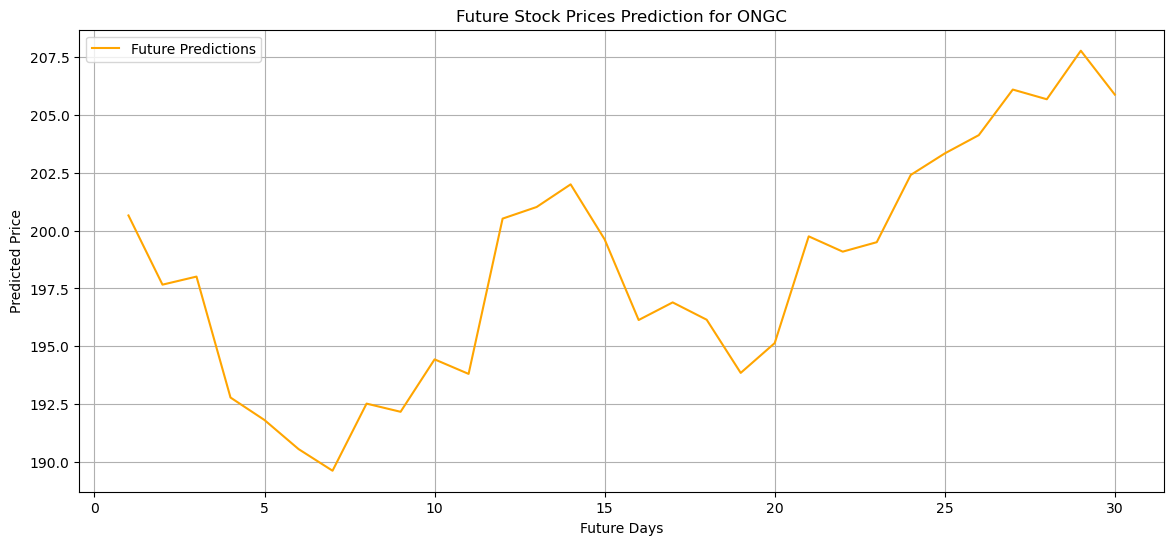

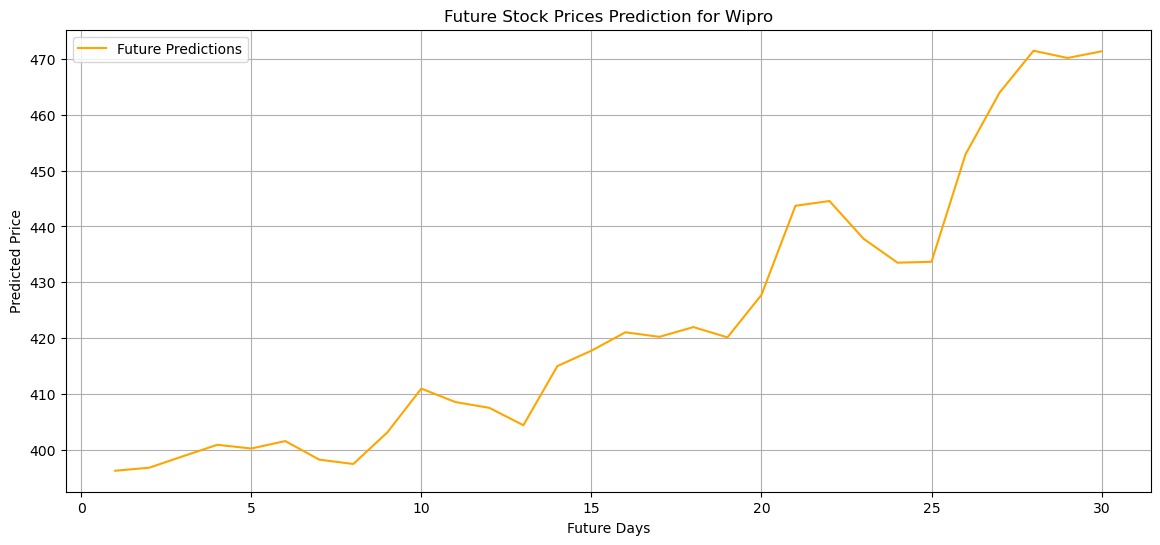

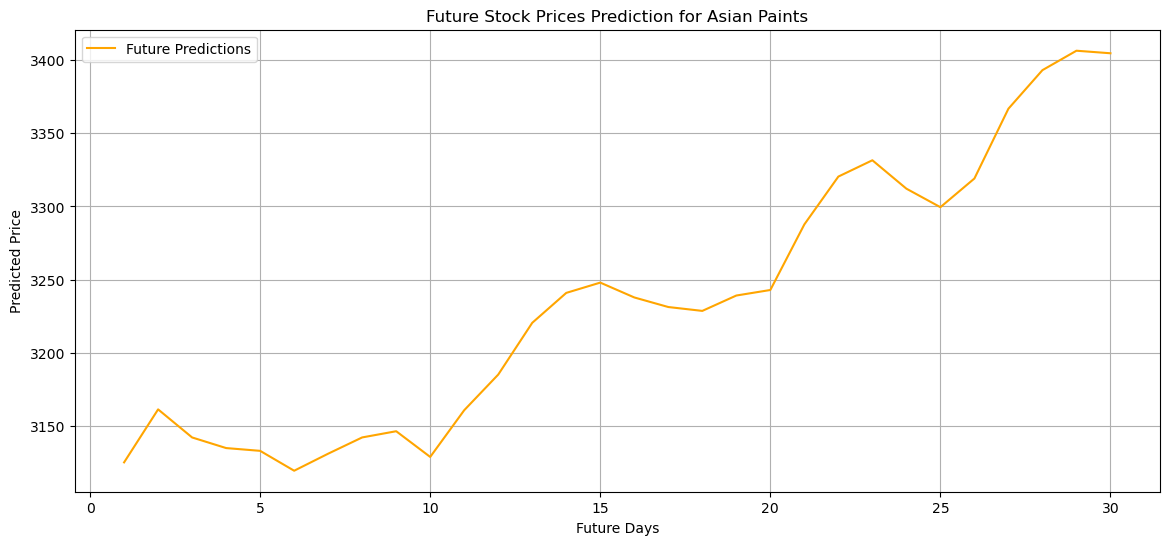

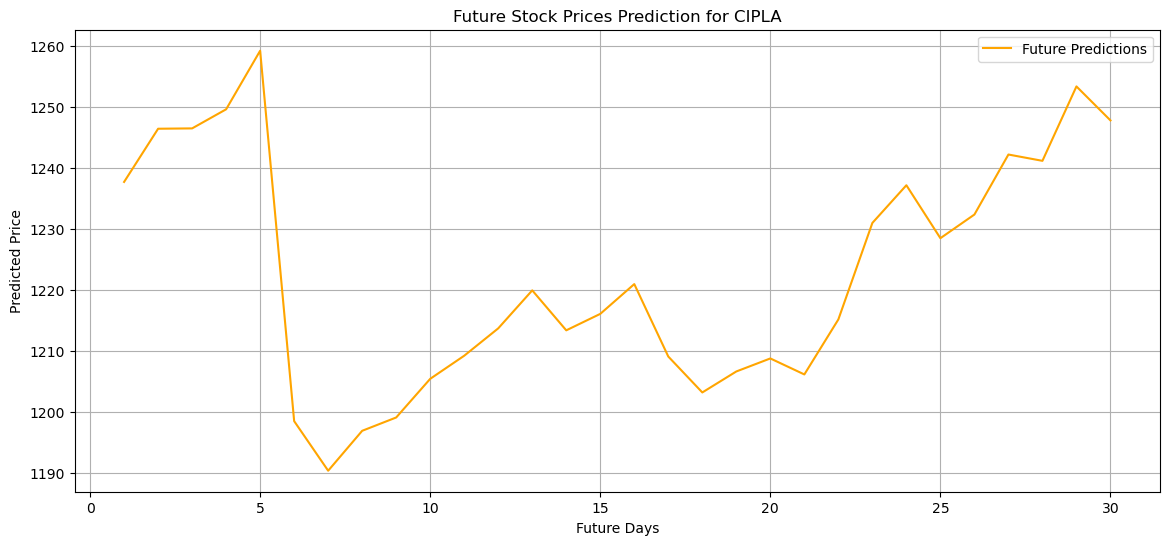

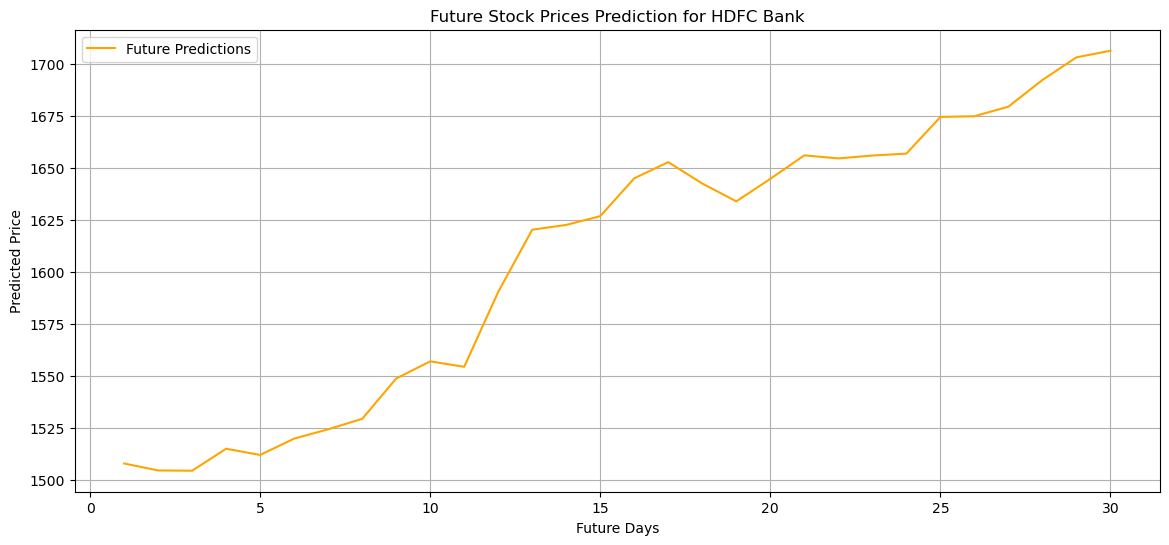

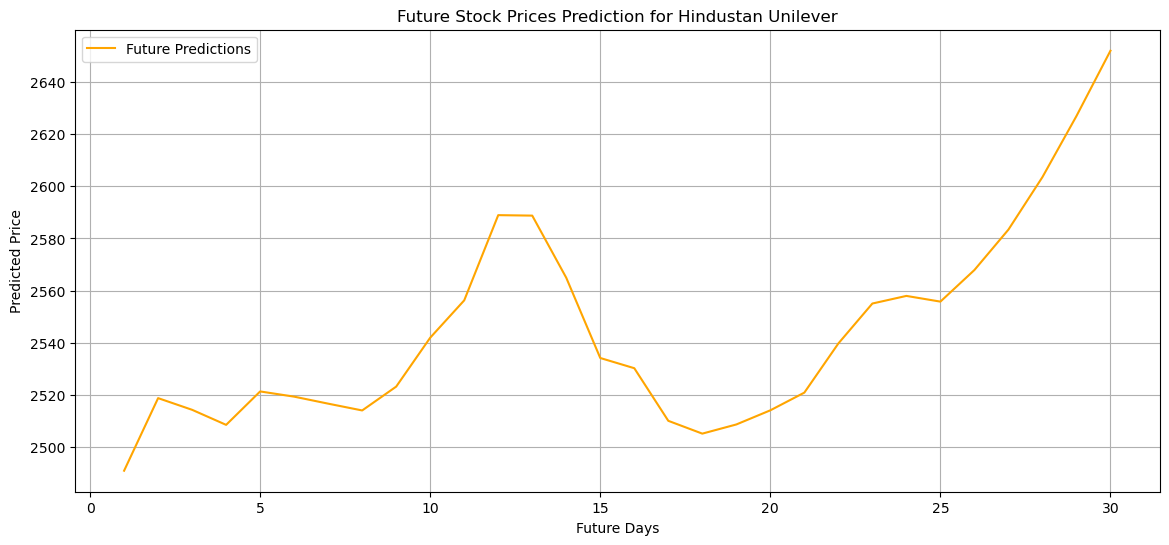

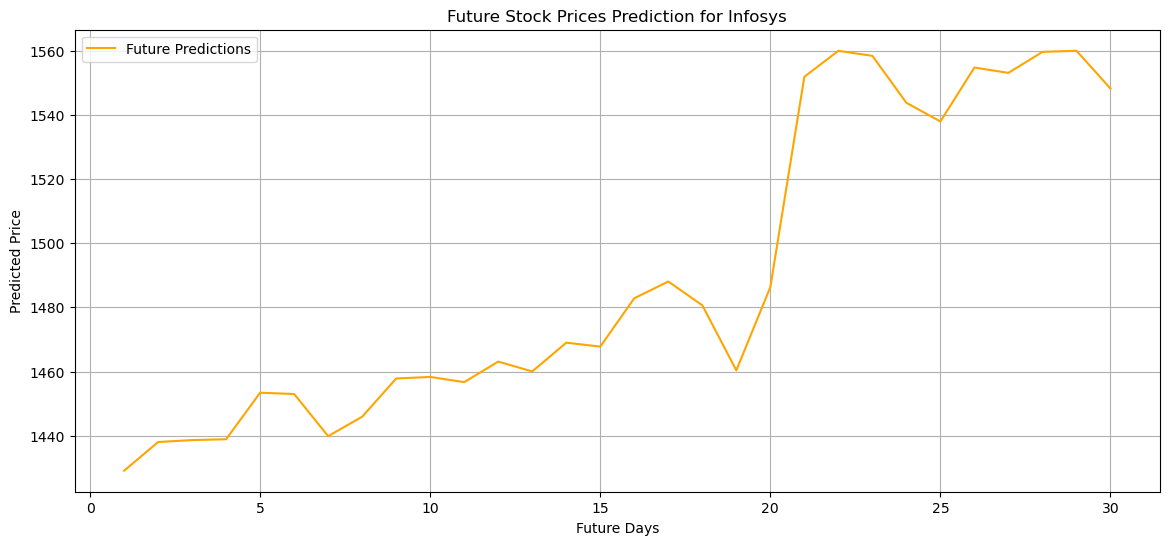

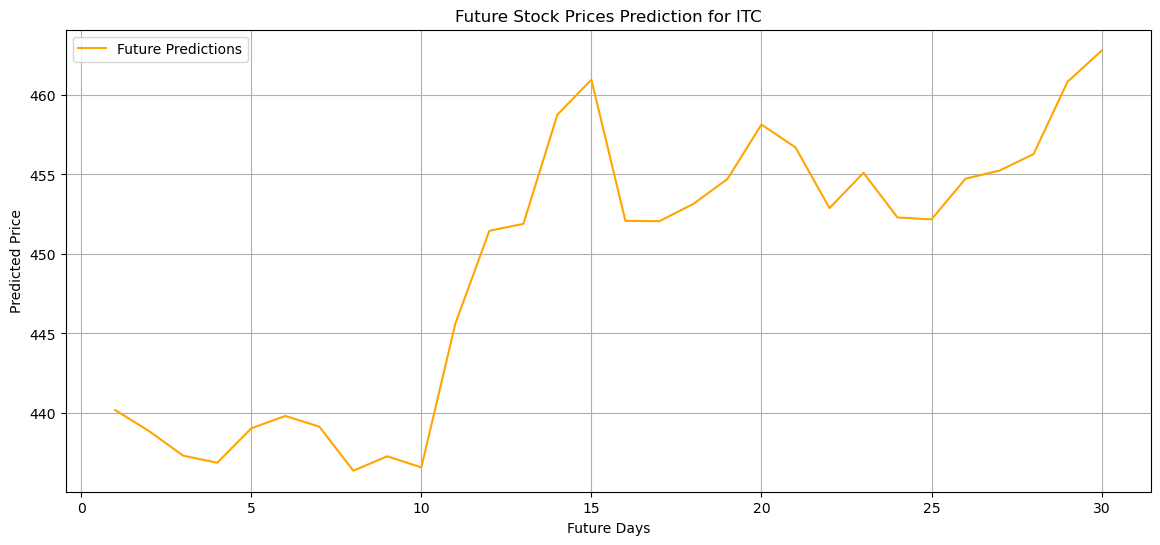

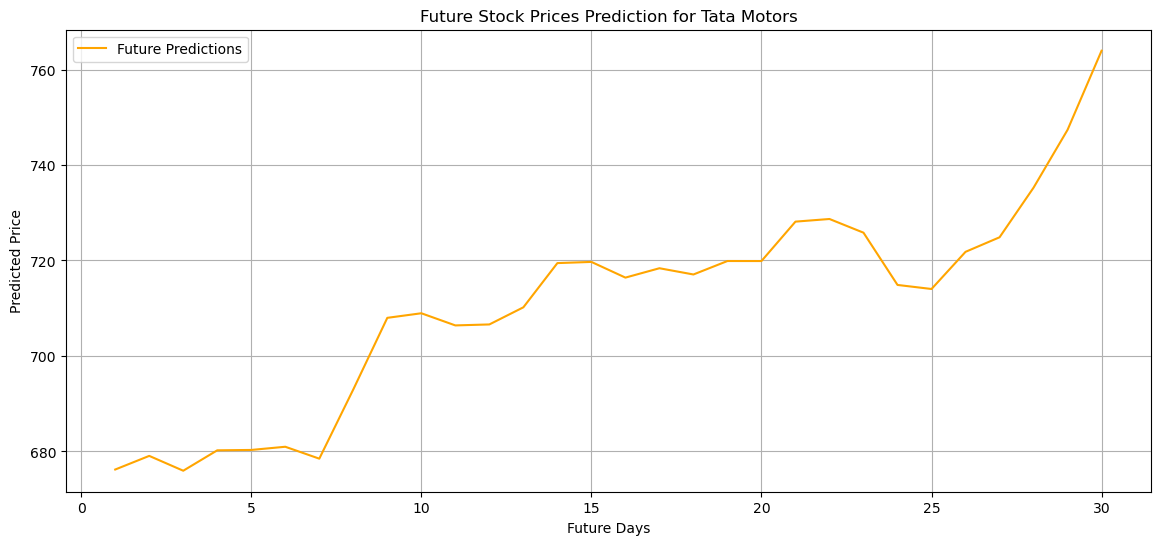

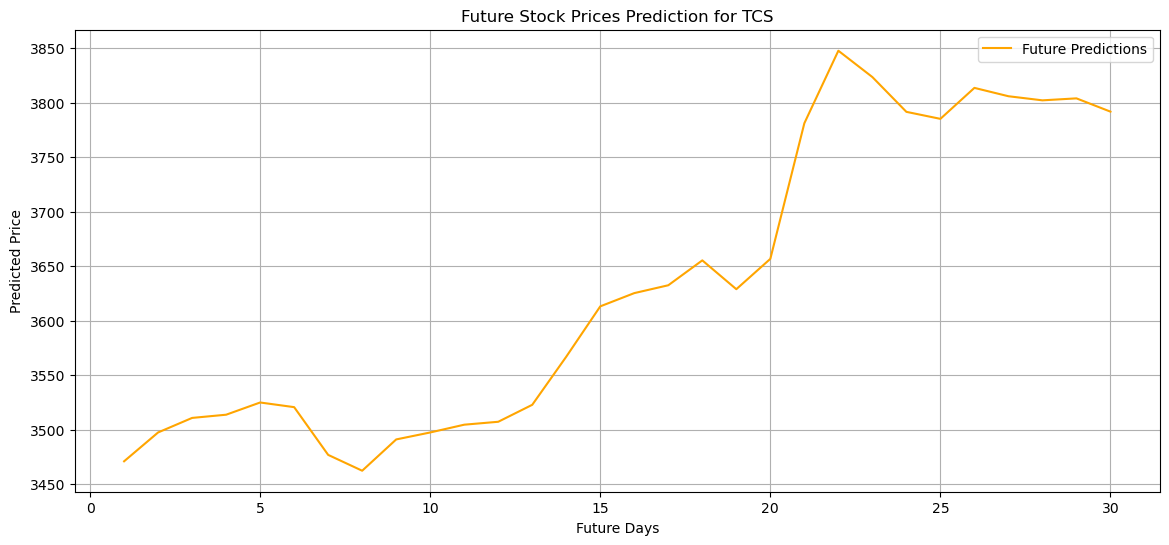

In [65]:
# Predict future stock prices for all companies using Random Forest and plot the results

# Function to prepare and predict future prices for a company
def predict_future_prices(company_name, df, feature_cols, target_col, model):
    # Prepare features and target
    features = df[feature_cols]
    target = df[target_col]
    
    # Split data (use all data for training since we predict future)
    model.fit(features, target)
    
    # Predict future prices using the latest data
    future_input = features.iloc[-30:].values  # Take the last 30 rows as input
    future_predictions = model.predict(future_input)
    
    return future_predictions

# List of companies and their features
company_predictions = {}
feature_cols = [col for col in features.columns if 'Lag' in col or 'MA' in col]  # Select lag and MA features
target_col = 'Close_NIFTY50'

# Iterate over each company dataset
for company_name, df in dataframes.items():
    # Clean and prepare individual data for prediction
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['5-Day MA'] = df['Close'].rolling(window=5).mean()
    df['20-Day MA'] = df['Close'].rolling(window=20).mean()
    for lag in range(1, 6):  # Add lagged features
        df[f'Lag_{lag}'] = df['Close'].shift(lag)
    df.dropna(inplace=True)  # Drop rows with NaN due to rolling and lag features
    
    # Define feature columns for this company
    company_feature_cols = ['5-Day MA', '20-Day MA'] + [f'Lag_{lag}' for lag in range(1, 6)]
    
    # Predict future prices
    future_predictions = predict_future_prices(company_name, df, company_feature_cols, 'Close', RandomForestRegressor(n_estimators=100, random_state=42))
    company_predictions[company_name] = future_predictions

# Plot future predictions for each company
for company_name, predictions in company_predictions.items():
    plt.figure(figsize=(14, 6))
    plt.plot(range(1, 31), predictions, label='Future Predictions', color='orange')
    plt.title(f'Future Stock Prices Prediction for {company_name}')
    plt.xlabel('Future Days')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.grid()
    plt.show()


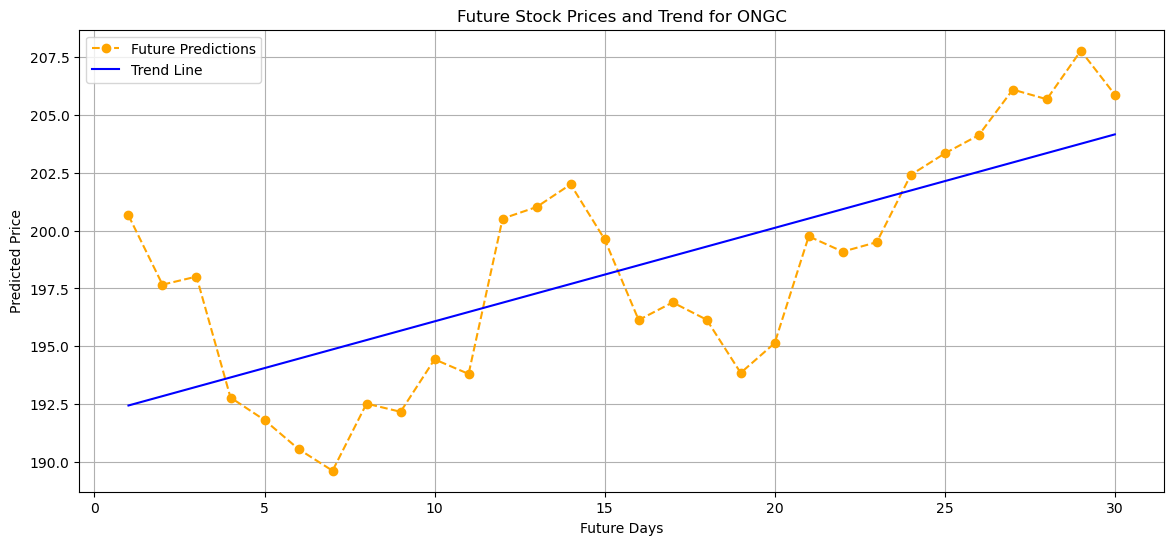

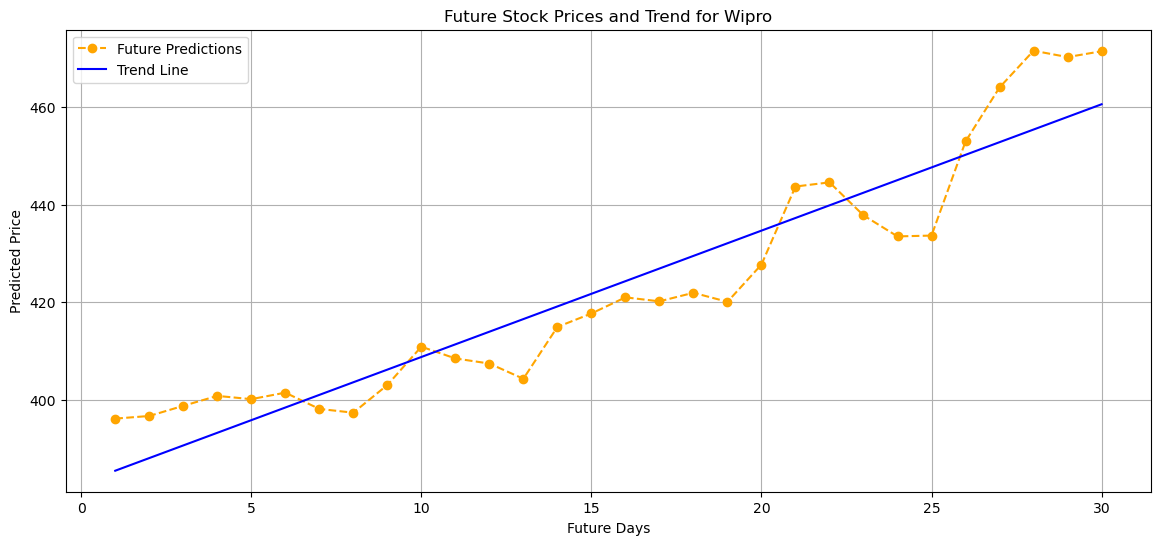

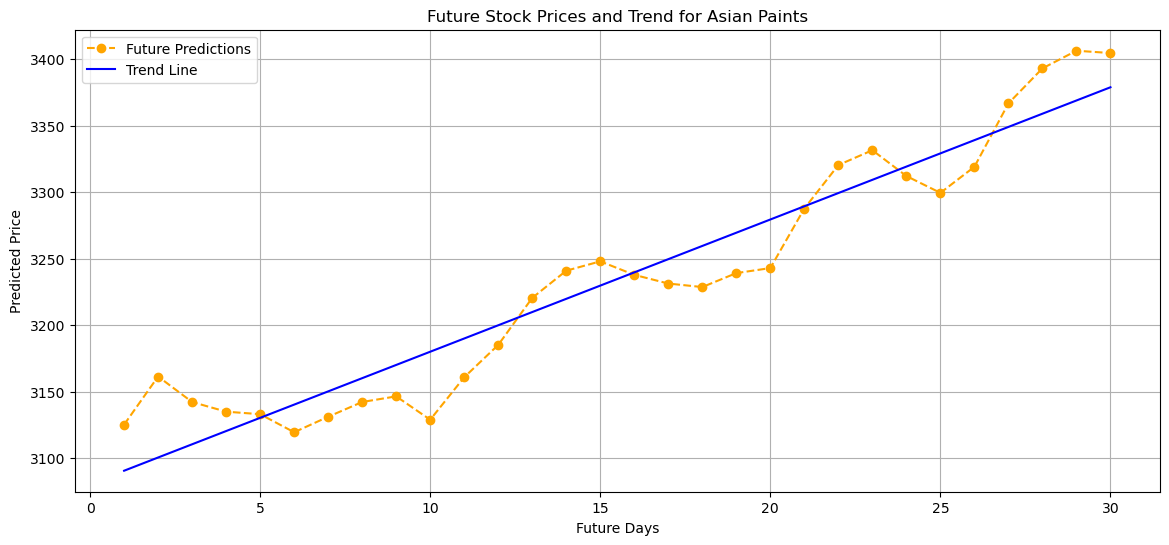

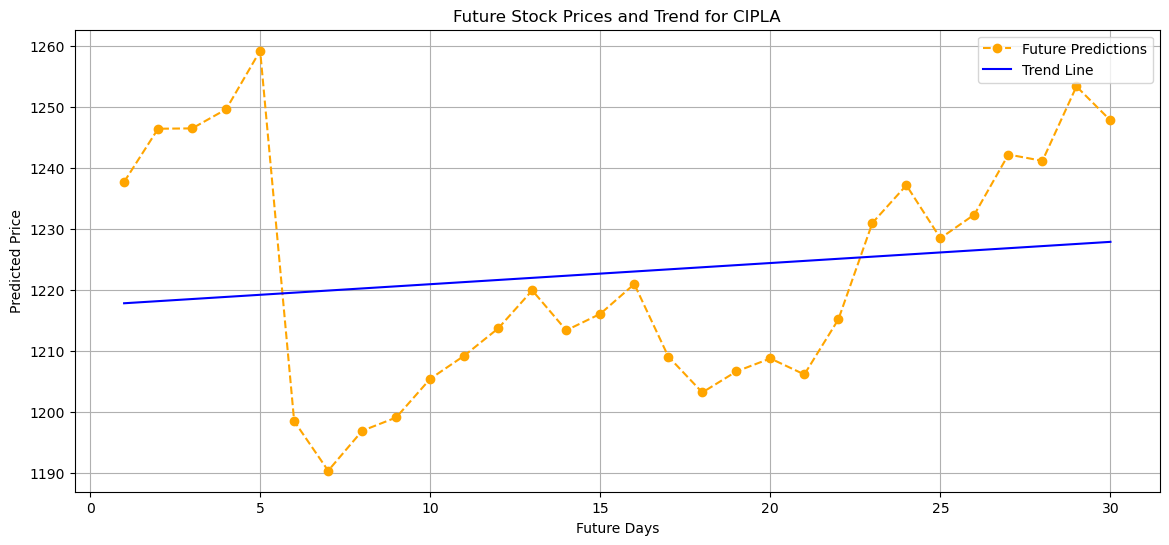

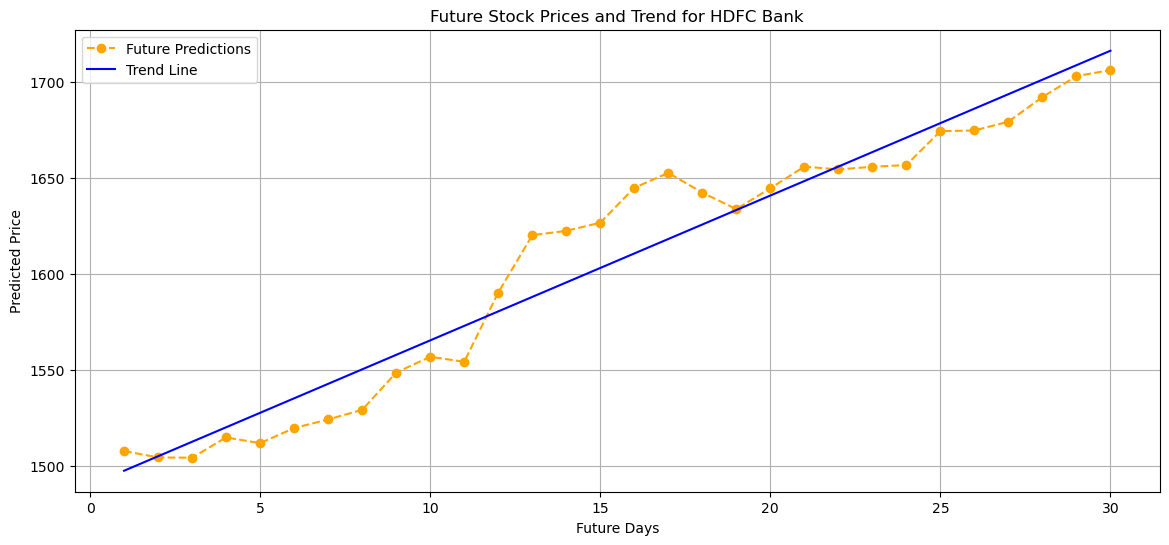

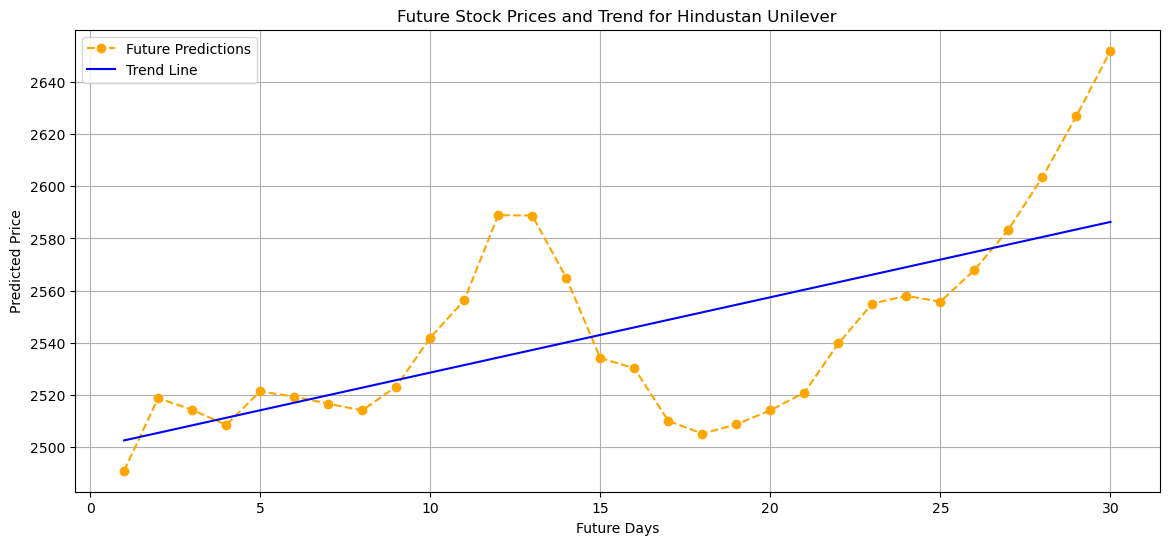

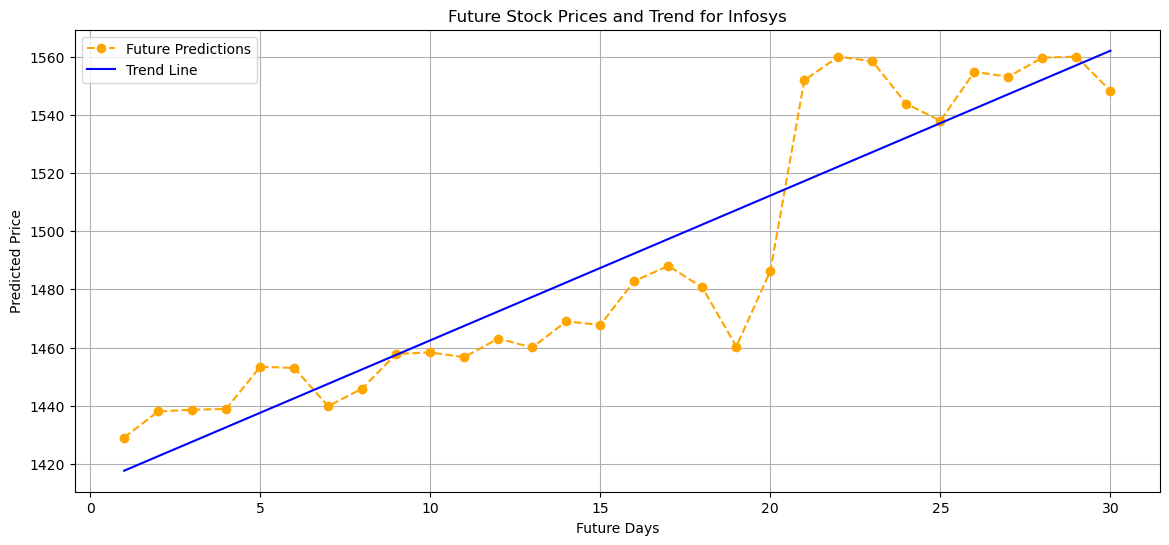

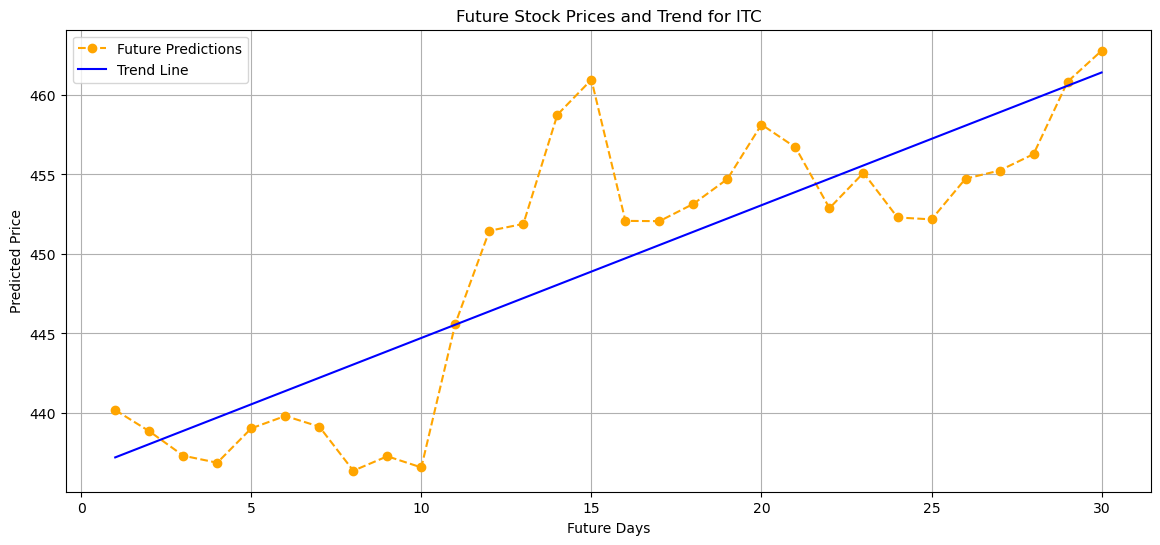

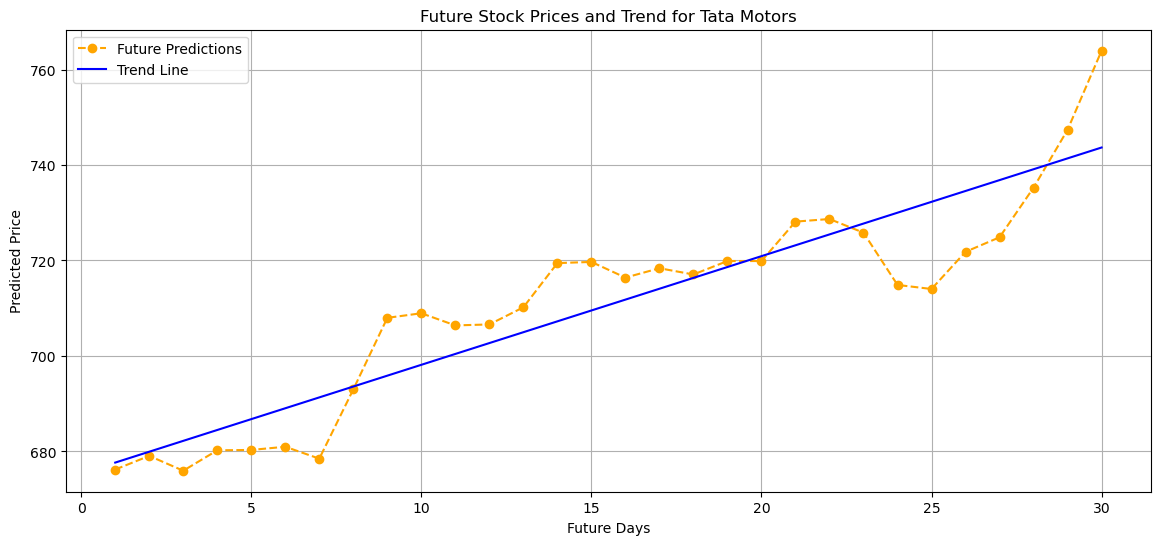

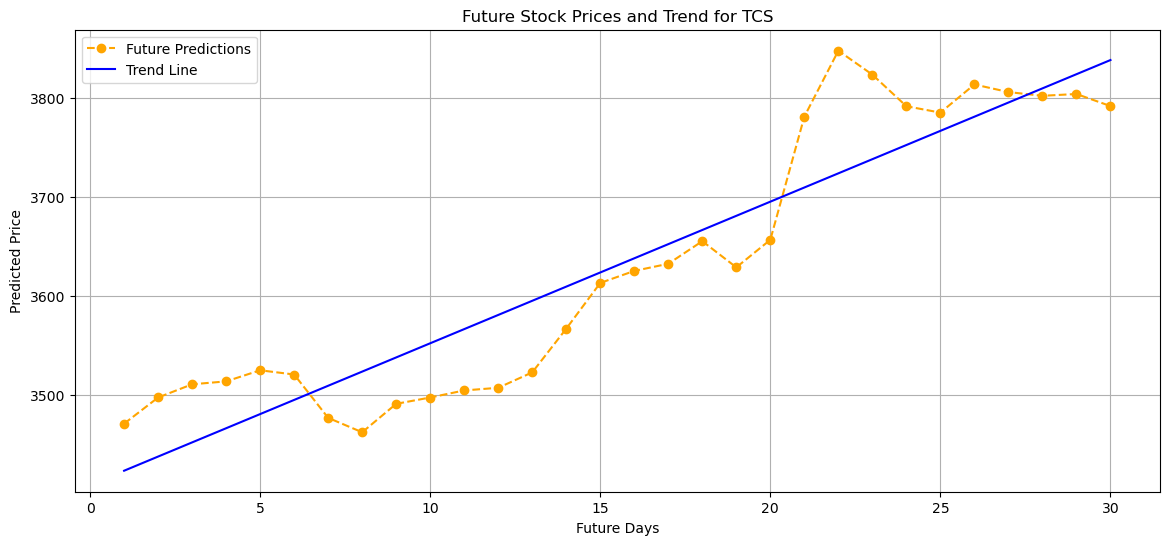

In [67]:
# Plot future price trends for each company with trends
for company_name, predictions in company_predictions.items():
    plt.figure(figsize=(14, 6))
    
    # Plot predicted prices for future dates
    plt.plot(range(1, 31), predictions, label='Future Predictions', color='orange', linestyle='--', marker='o')
    
    # Add trend line using a simple linear regression model
    z = np.polyfit(range(1, 31), predictions, 1)
    trend = np.poly1d(z)
    plt.plot(range(1, 31), trend(range(1, 31)), label='Trend Line', color='blue', linestyle='-')
    
    # Add titles and labels
    plt.title(f'Future Stock Prices and Trend for {company_name}')
    plt.xlabel('Future Days')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.grid(True)
    plt.show()
